## Linear regression with one variable


### Model representation
|지도 학습|비지도 학습|강화 학습|
|------|---|---|
|- 레이블된 데이터<br> -직접 피드백 <br> - 출력 및 미래 예측|- 레이블 및 타깃 없음<br> - 피드백 없음<br> - 데이터에서 숨겨진 구조 찾기|- 결과 과정<br> - 보상 시스템<br>- 연속된 행동에서 학습|


### 지도 학습으로 미래 예측
지도 학습의 주요 목적은 레이블된 훈련 데이터에서 모델을 학습하여 본 적 없는 미래 데이터에 대한 예측을 만드는 것이다.

여기서 **지도**(supervised)는 희망하는 출력 신호(레이블)가 있는 일련의 샘플을 의미한다.

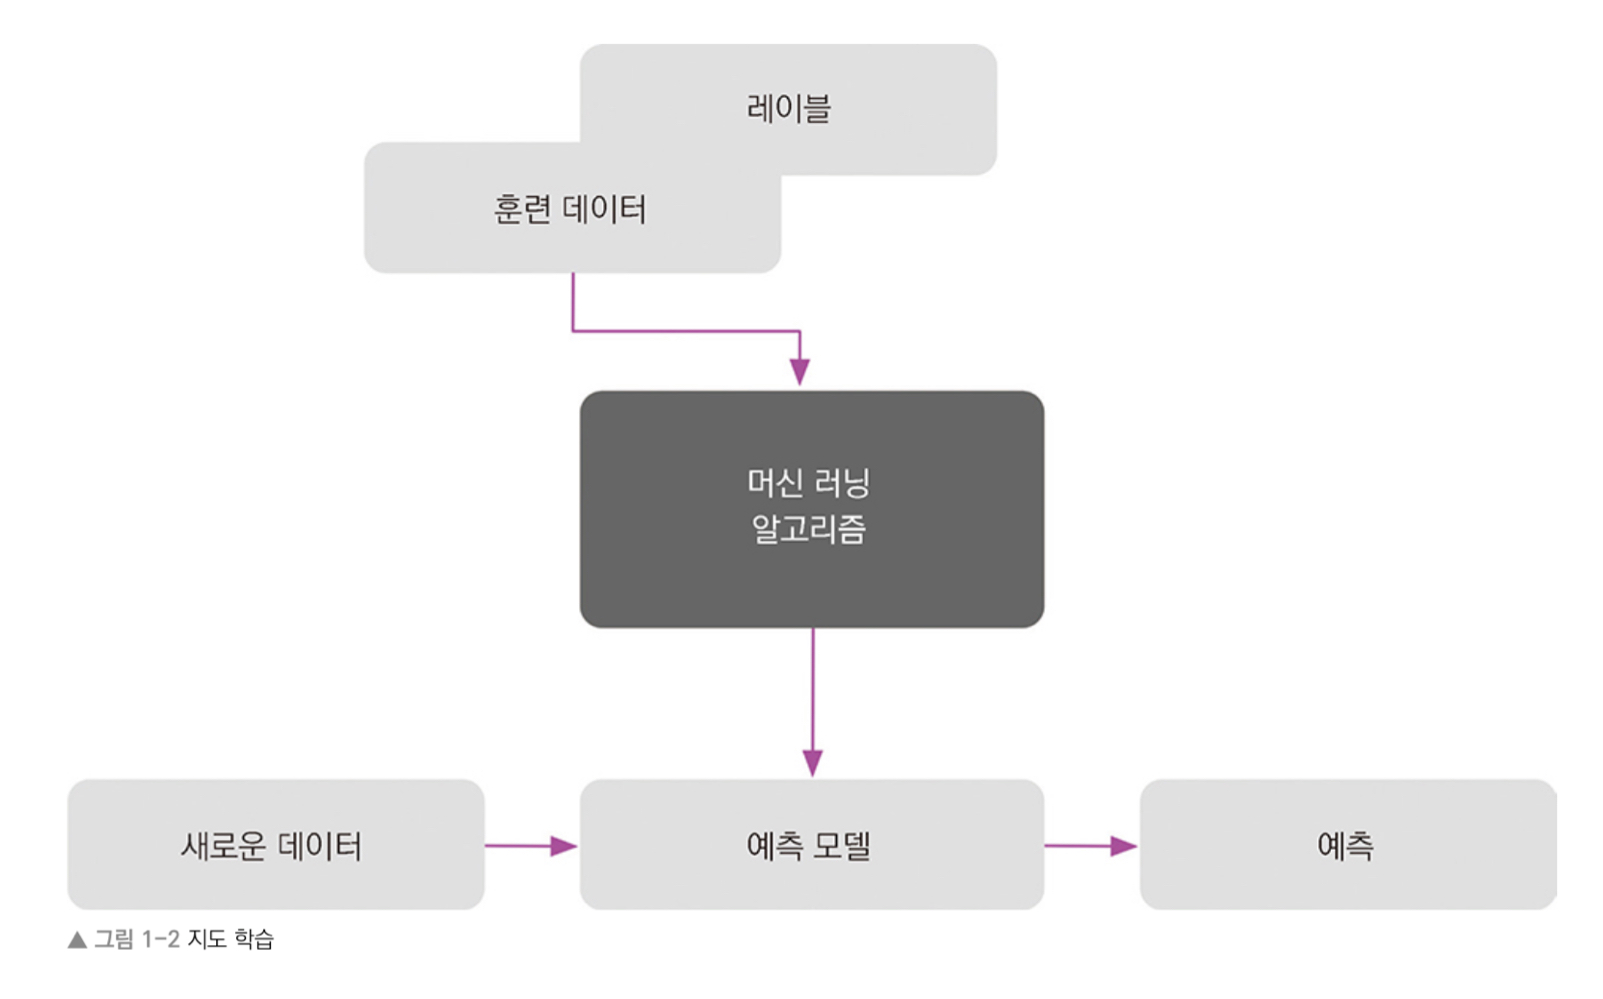

In [5]:
from IPython.display import Image
Image("./img/지도학습.jpeg", width=500,retina=True)

* 개별 클래스 레이블이 있는 지도 학습을 **분류**(cluster)라고 한다.
* 연속적인 값을 출력하는 **회귀**(regression)이다.

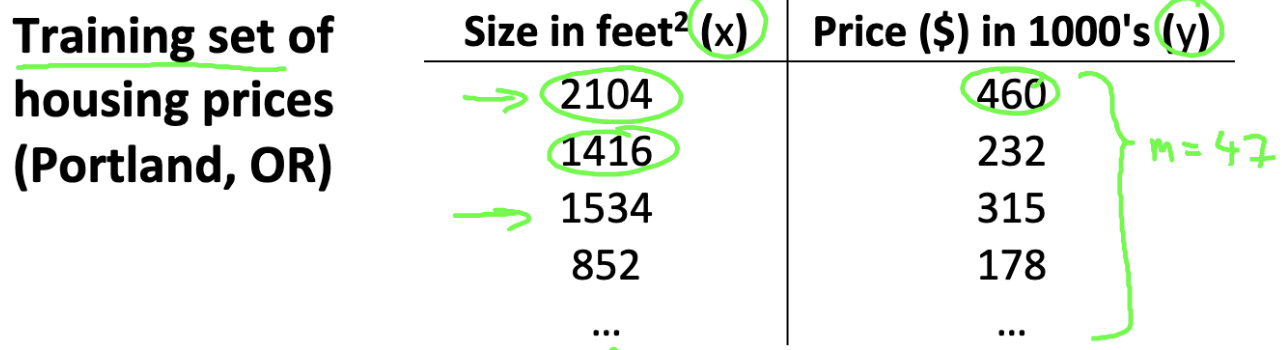

In [6]:
Image("/Users/taewoong/Documents/NLP_1/img/스크린샷 2021-08-24 오후 3.30.27.png", retina=True)

* m = Number of training examples
* x's = "input" variable / features
* y's = "output" variable / "target" variable

### Cost Function


Hypothesis : $h_\theta = \theta_0 + \theta_1 x$

Prameters : $\theta_0, \theta_1 x$

Cost Function : $J(\theta_0, \theta_1) = \frac{1}{2m}\sum_{i=1}^{m} (h_\theta(x^{(i)} - y^{(i)})^2 $

Goal : $minimize_{\theta_0, \theta_1}$ : $J(\theta_0, \theta_1)$


**Simplified**

Hypothesis : $h_\theta(x) = \theta_1x$

Prameters : $ \theta_1 $

Cost Function : $J(\theta_0) = \frac{1}{2m}\sum_{i=1}^{m} (h_\theta(x^{(i)} - y^{(i)})^2 $

Goal : $minimize_{\theta_1}$ : $J(\theta_1)$

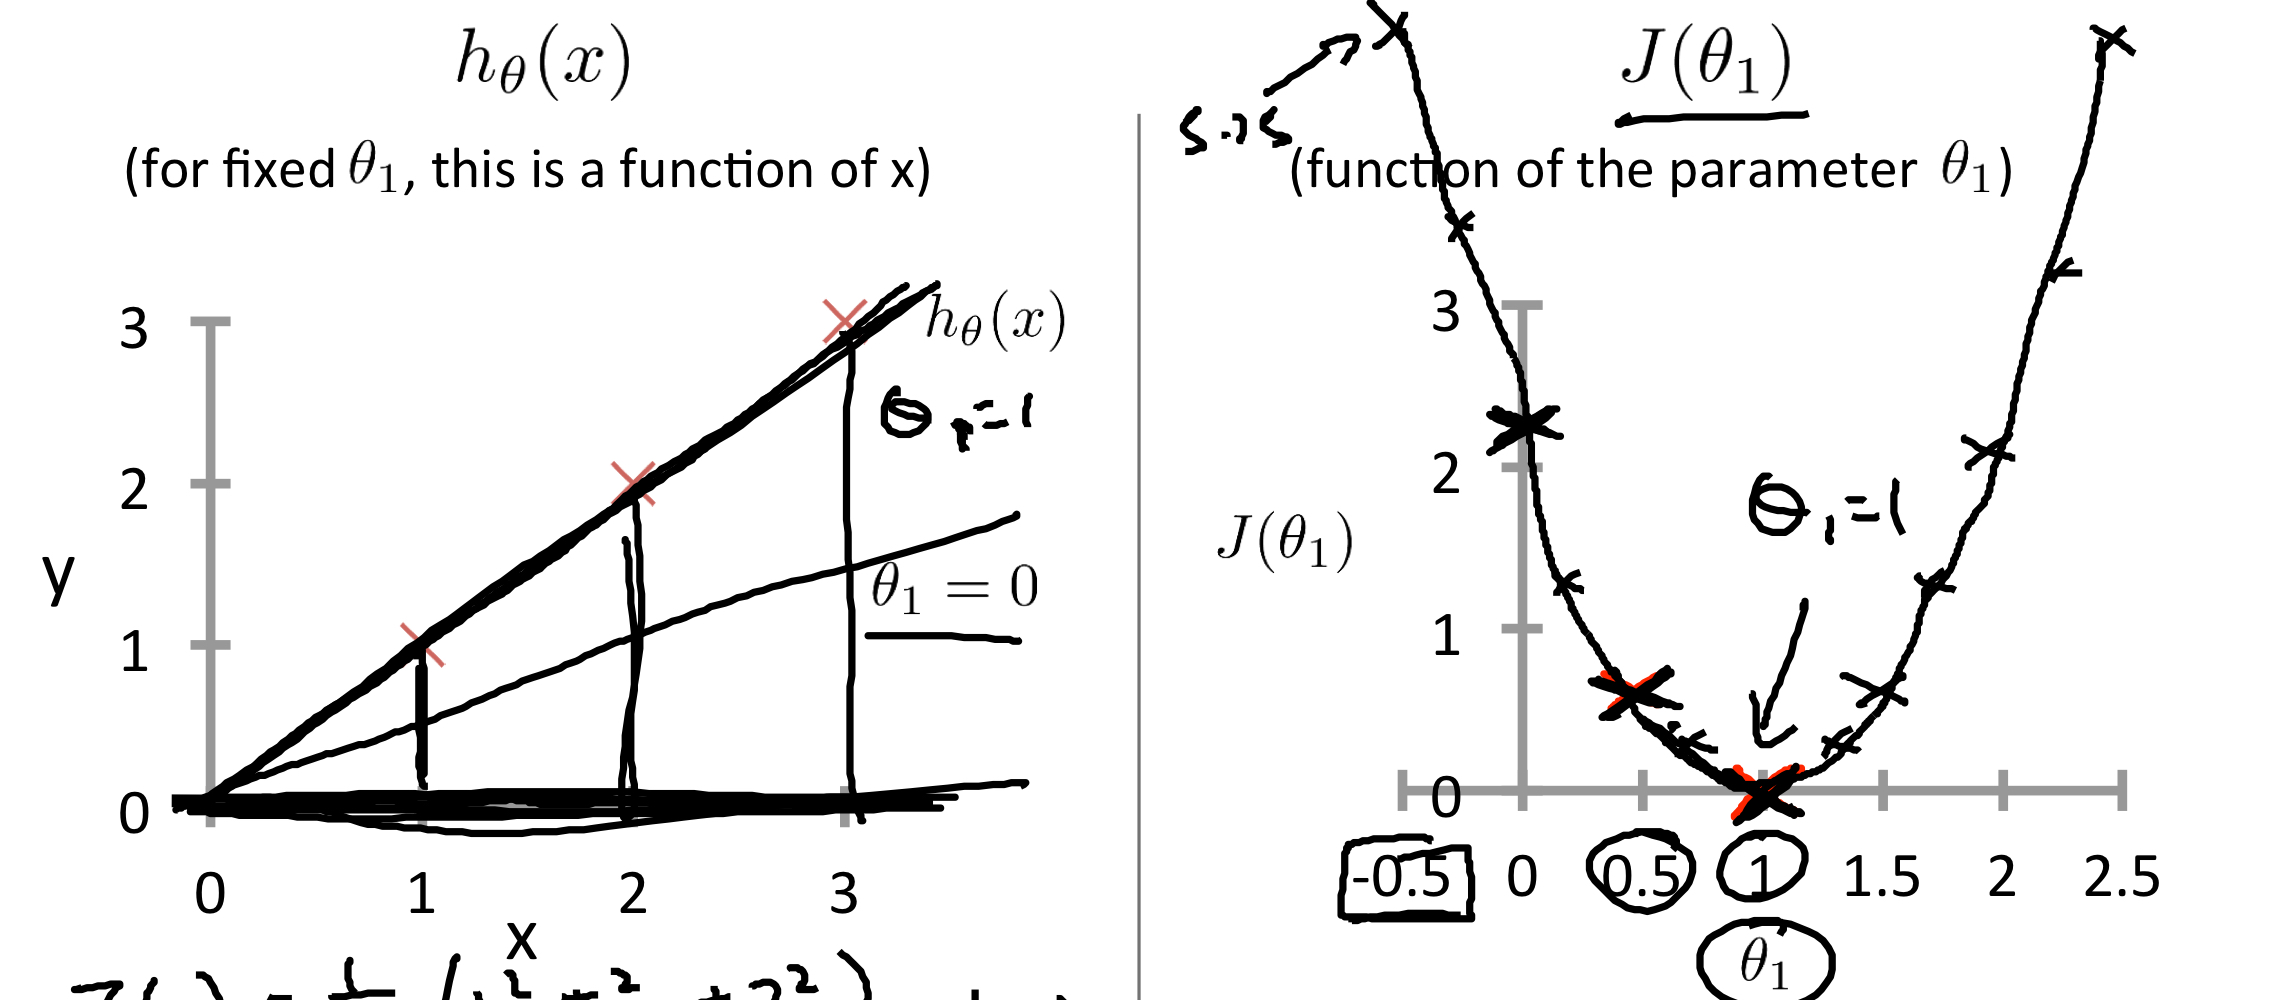

In [7]:
Image("/Users/taewoong/Documents/NLP_1/img/IMG_90B569A7D585-1.jpeg", retina=True)

### Gradient descent

Have some fuction $J(\theta_0, \theta_1)$ want $min_{\theta_0, \theta_1} J(\theta_0, \theta_1)$


**Outline**:
* Start with some $\theta_0,\theta_1$ (random한 두 좌표를 선택한다.)
* $\theta_0,\theta_1$의 값을 바꿔가면서 $J(\theta_0, \theta_1)$ 값을 최소화 시킨다.

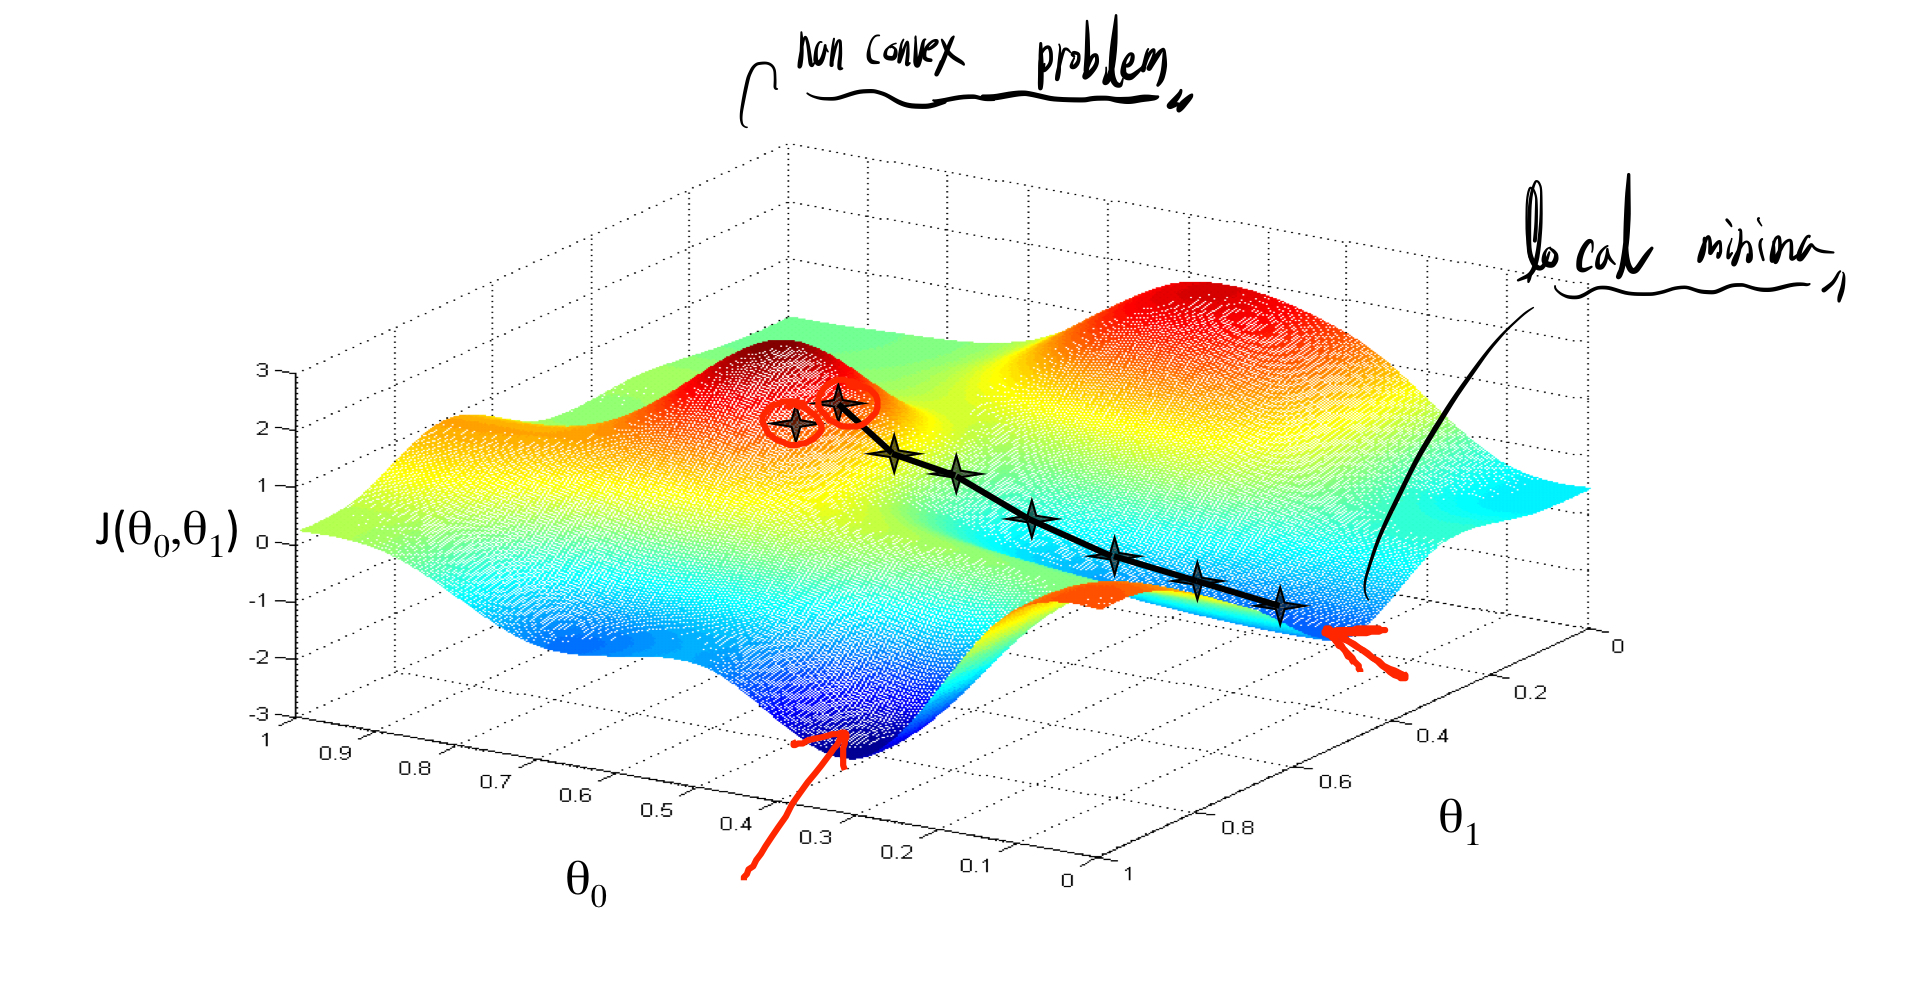

In [8]:
Image('/Users/taewoong/Documents/NLP_1/img/IMG_2411BCA22901-1.jpeg',  retina=True)

**Gradient descent algorithm**

<img src="https://nbviewer.jupyter.org/github/engineersCode/EngComp6_deeplearning/blob/master/images/descent.png
" width="400" height="300" />


repeat until convergence
$\theta_j := \theta_j - \alpha \frac{\delta}{\delta\theta_j}J(\theta_0,\theta_1)$  (for  $j=0$ and $j=1$)


EX) $y = 2x^2 - 4x + 5$

➤ $J(\theta_1) = 2\theta_1^2 - 4\theta + 5 = 2(\theta_1 - 1)^2$

In [8]:
import sympy
import numpy

from matplotlib import pyplot
%matplotlib inline
sympy.init_printing()
w = sympy.Symbol('w', real=True)

f = 2*w**2 - 4*w + 5
f

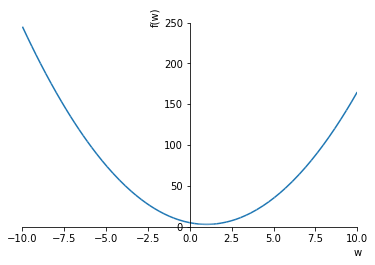

In [12]:
sympy.plotting.plot(f);

1차 미분한 식은 다음과 같이 알아볼 수 있습니다.

In [15]:
fprime = f.diff(w)
fprime

In [16]:
sympy.solve(fprime, w)

위의 예시의 경우 $\theta = 1$에서 최솟값을 갖는 다는 것을 쉽게 알수 있다. 하지만 parameter가 많아지고 식이 복잡해지면 위의 방식으로 문제를 해결하는데 어려움이 존재한다.

*  Gradient Descent 방법으로 한번에 정답에 접근하는 것이 아닌 반복적으로 정답에 가까워지는 방법입니다.

In [18]:
fpnum = sympy.lambdify(w, fprime)
type(fpnum)

w = 10.0   # starting guess for the min

for i in range(1000):
    w = w - fpnum(w)*0.01 # with 0.01 the step size

print(w)

1.0000000000000027


이처럼 첫번째 방법과 두번째 방법에서 같은 값이 나온 것을 알 수 있습니다.



실제로 linear 한 관계를 가진 데이터 셋을 사용하기 위해서 직접 데이터를 만들어보도록 하겠습니다.

Numpy 패키지 안에 Normal distribution 함수를 통해서 조금의 noise 를 추가해서 생성하도록 하겠습니다.

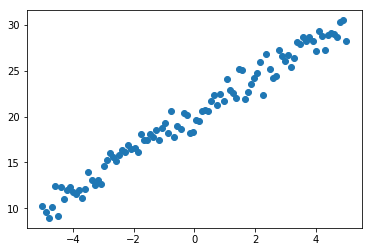

In [19]:
x_data = numpy.linspace(-5, 5, 100)
w_true = 2
b_true = 20

y_data = w_true*x_data + b_true + numpy.random.normal(size=len(x_data))

pyplot.scatter(x_data,y_data);

In [20]:
print(x_data.shape)
print(y_data.shape)

(100,)
(100,)


총 100개의 데이터를 생성하였습니다. 이제 코드를 통해 접근해보도록 하겠습니다.

먼저 cost function을 나타내보겠습니다.

In [21]:
w, b, x, y = sympy.symbols('w b x y')

cost_function = (w*x + b - y)**2
cost_function

In [22]:
grad_b = sympy.lambdify([w,b,x,y], cost_function.diff(b), 'numpy')
grad_w = sympy.lambdify([w,b,x,y], cost_function.diff(w), 'numpy')

In [24]:
w = 0
b = 0

for i in range(1000):
    descent_b = numpy.sum(grad_b(w,b,x_data,y_data))/len(x_data)
    descent_w = numpy.sum(grad_w(w,b,x_data,y_data))/len(x_data)
    w = w - descent_w*0.01 # with 0.01 the step size
    b = b - descent_b*0.01

print(w)
print(b)

2.016438238353983
20.196956966666658


처음에 데이터를 생성할 때 정의한  𝑤,𝑏  값과 매우 유사한 값을 구할 수 있었습니다.

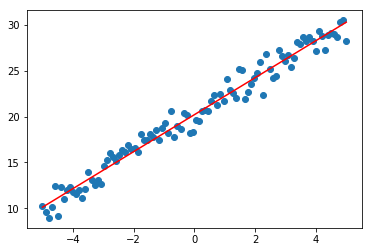

In [25]:
pyplot.scatter(x_data,y_data)
pyplot.plot(x_data, w*x_data + b, '-r');

우리가 구한 직선이 데이터와 잘 맞는 것을 볼 수 있습니다.

### Reference

* 머신러닝 교과서 with 파이썬, 사이킷런, 텐서프롤 -길벗-
* https://k-digital.goorm.io/learn/lecture/28383/ai%EA%B8%B0%EC%88%A0-%EC%9E%90%EC%97%B0%EC%96%B4-%EC%B2%98%EB%A6%AC-%EC%A0%84%EB%AC%B8%EA%B0%80-%EC%96%91%EC%84%B1-%EA%B3%BC%EC%A0%95-1%EA%B8%B0
